In [62]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
ima1 = cv2.imread('apple.jpg')
ima = cv2.GaussianBlur(ima1,(5,5),0)

In [63]:
# threshold with each channel
m=ima.shape[0]
n= ima.shape[1]
x_i= np.arange(255).reshape(1,255)
N =m*n
hist = cv2.calcHist(ima,[0],None,[255],[0,255])
u_bg=(1/N)*np.sum(np.dot(x_i,hist))

In [64]:
def threshold(image,channel):
    hist = cv2.calcHist(image,[channel],None,[255],[0,255])
    va_bt = np.zeros((255,1))
    u_fg=0
    u_bg=(1/N)*np.sum(np.dot(x_i,hist))
    for i in range(255):
        N_f= np.sum(hist[1:i])/N
        N_b = np.sum(hist[(i+1):])/N
        u_fg =  u_fg + (1/N)*np.multiply(x_i[:,i],hist[i])
        u_bg = u_bg - (1/N)*np.multiply(x_i[:,i],hist[i])
        va_bt[i] = np.multiply((N_f*N_b),np.power((u_fg-u_bg),2))
    V_min = np.amin(va_bt,axis=0)
    threshold = 0
    for i in range(255):
        if(va_bt[i]== V_min):
            threshold = i-1
    return threshold

In [65]:
T_B = threshold(ima,0)
T_G = threshold(ima,1)
T_R = threshold(ima,2)


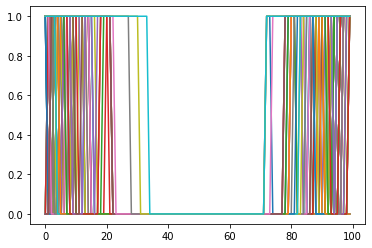

In [68]:
# average of threshold
T = int(T_B+T_G+T_R)/3
#subtract background
im_threshold = np.array((m,n))
im_threshold = ima>T
plt.plot(im_threshold[:,:,0])

253

253